In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [58]:
PW_CUTOFF = np.array(
    [400,  450,  500,  550,  600,  650,  700,
     750,  800,  850,  900,  950, 1000, 1050, 1100, 1150, 1200, 1250,
    1300, 1350, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2500, 3000,
    3500, 4000]).astype(int)

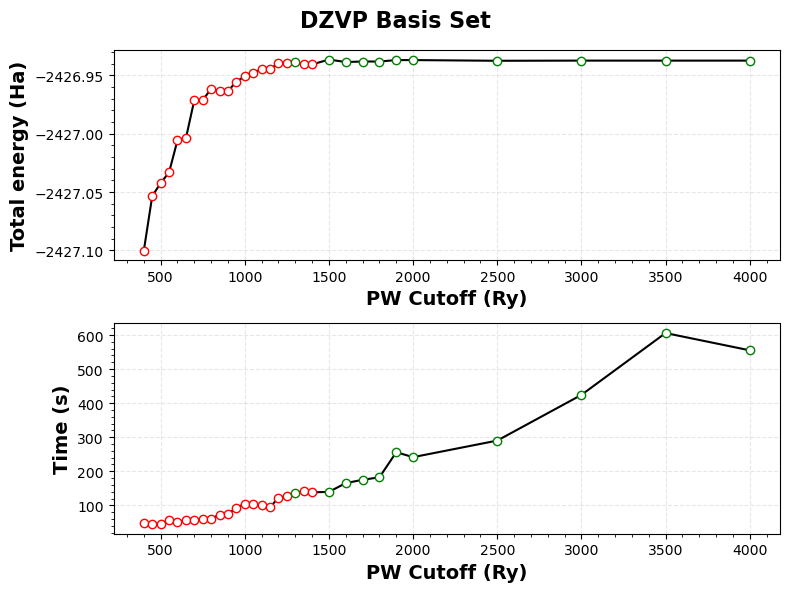

In [79]:
results = []

for energy in PW_CUTOFF:
    with open(os.path.join('DZVP', str(energy), 'simulation_SCF.out'), 'r') as f:
        lines = f.read().splitlines()

    total_energy = [float(i.split()[-1]) for i in lines if 'Total energy:  ' in i][-1]
    time = [float(i.split()[-1]) for i in lines if ' CP2K                                 1' in i][-1]
    results.append([energy, total_energy, time])

results = np.array(results).T

fig, ax = plt.subplots(2, 1, figsize=(8, 6))

fig.suptitle('DZVP Basis Set', fontsize=16, fontweight='bold')

ax[0].plot(PW_CUTOFF, results[1], '-', color='black')
ax[0].set_xlabel('PW Cutoff (Ry)', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Total energy (Ha)', fontsize=14, fontweight='bold')
ax[0].grid(alpha=0.3, ls='--')
ax[0].minorticks_on()

ax[1].plot(PW_CUTOFF, results[2], '-', color='black')
ax[1].set_xlabel('PW Cutoff (Ry)', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Time (s)', fontsize=14, fontweight='bold')

ax[1].grid(alpha=0.3, ls='--')
ax[1].minorticks_on()

for i, energy in enumerate(results[1]):
    if abs(energy - results[1][-1]) > 0.0015936010974213599:
        ax[0].plot(PW_CUTOFF[i], energy, 'o', mfc='white', mec='red')
        ax[1].plot(PW_CUTOFF[i], results[2][i], 'o', mfc='white', mec='red')
    else:
        ax[0].plot(PW_CUTOFF[i], energy, 'o', mfc='white', mec='green')
        ax[1].plot(PW_CUTOFF[i], results[2][i], 'o', mfc='white', mec='green')

plt.tight_layout()
plt.savefig('DZVP.png', dpi=300)

plt.show()   



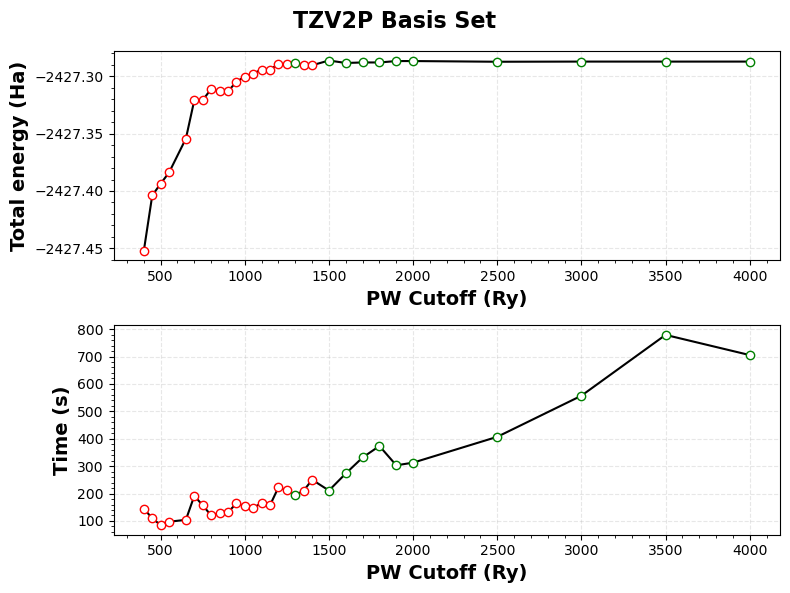

In [78]:
results = []

for energy in PW_CUTOFF:
    with open(os.path.join('TZV2P', str(energy), 'simulation_SCF.out'), 'r') as f:
        lines = f.read().splitlines()
    try:
        total_energy = [float(i.split()[-1]) for i in lines if 'Total energy:  ' in i][-1]
        time = [float(i.split()[-1]) for i in lines if ' CP2K                                 1' in i][-1]
        results.append([energy, total_energy, time])
    except:
        pass

results = np.array(results).T

fig, ax = plt.subplots(2, 1, figsize=(8, 6))

fig.suptitle('TZV2P Basis Set', fontsize=16, fontweight='bold')

ax[0].plot(results[0], results[1], '-', color='black')
ax[0].set_xlabel('PW Cutoff (Ry)', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Total energy (Ha)', fontsize=14, fontweight='bold')
ax[0].grid(alpha=0.3, ls='--')
ax[0].minorticks_on()

# Turn off scientific notation on axis y
ax[0].ticklabel_format(useOffset=False, style='plain', axis='y')

ax[1].plot(results[0], results[2], '-', color='black')
ax[1].set_xlabel('PW Cutoff (Ry)', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Time (s)', fontsize=14, fontweight='bold')

ax[1].grid(alpha=0.3, ls='--')
ax[1].minorticks_on()

# Set yticks as [100, 200, 300, 400, 500, 600]
ax[1].set_yticks(np.arange(100, 900, 100))

for i, energy in enumerate(results[1]):
    if abs(energy - results[1][-1]) > 0.0015936010974213599:
        ax[0].plot(results[0][i], energy, 'o', mfc='white', mec='red')
        ax[1].plot(results[0][i], results[2][i], 'o', mfc='white', mec='red')
    else:
        ax[0].plot(results[0][i], energy, 'o', mfc='white', mec='green')
        ax[1].plot(results[0][i], results[2][i], 'o', mfc='white', mec='green')

plt.tight_layout()

plt.savefig('TZV2P.png', dpi=300)

plt.show()   

